<a href="https://colab.research.google.com/github/rehmanaly0051/Exterior-Design-Model/blob/main/TheLastRide.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install everything needed
!pip install --upgrade diffusers transformers accelerate xformers torch torchvision torchaudio --quiet
!pip install opencv-python pillow tqdm --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 31.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 354.7/354.7 kB 15.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.4/43.4 MB 18.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 93.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 69.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 47.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2

In [ ]:
!apt update
!apt install -y nvidia-driver-535

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [1,607 kB]
Get:4 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:5 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:7 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:8 https://r2u.stat.illinois.edu/ubuntu jammy/main amd64 Packages [2,700 kB]
Hit:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease [24.3 kB]
Get:11 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Hit:12 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:13 http://archive.ubuntu.com/ubunt

In [ ]:
import torch
torch.version.cuda

'12.4'

In [2]:
!pip install -U xformers --index-url https://download.pytorch.org/whl/cu124

Looking in indexes: https://download.pytorch.org/whl/cu124
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 67.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 51.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 112.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 812.2 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 981.8 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 73.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.4/43.4 MB 15.6 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Fo

⏳ Loading AI models (this may take a few minutes)...


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

🖼️ Choose input method:


Saving salu2.jpg to salu2 (1).jpg

🔧 Processing floor plan...


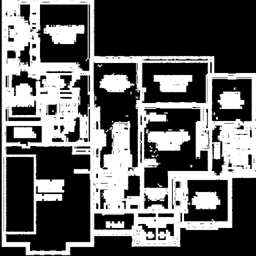


🎨 Generating exterior views:


  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/45 [00:00<?, ?it/s]

 25%|██▌       | 1/4 [00:38<01:55, 38.44s/it]

  0%|          | 0/45 [00:00<?, ?it/s]

 50%|█████     | 2/4 [00:46<00:41, 20.51s/it]

  0%|          | 0/45 [00:00<?, ?it/s]

 75%|███████▌  | 3/4 [00:54<00:14, 14.81s/it]

  0%|          | 0/45 [00:00<?, ?it/s]

100%|██████████| 4/4 [01:02<00:00, 15.62s/it]


✅ Generation complete!


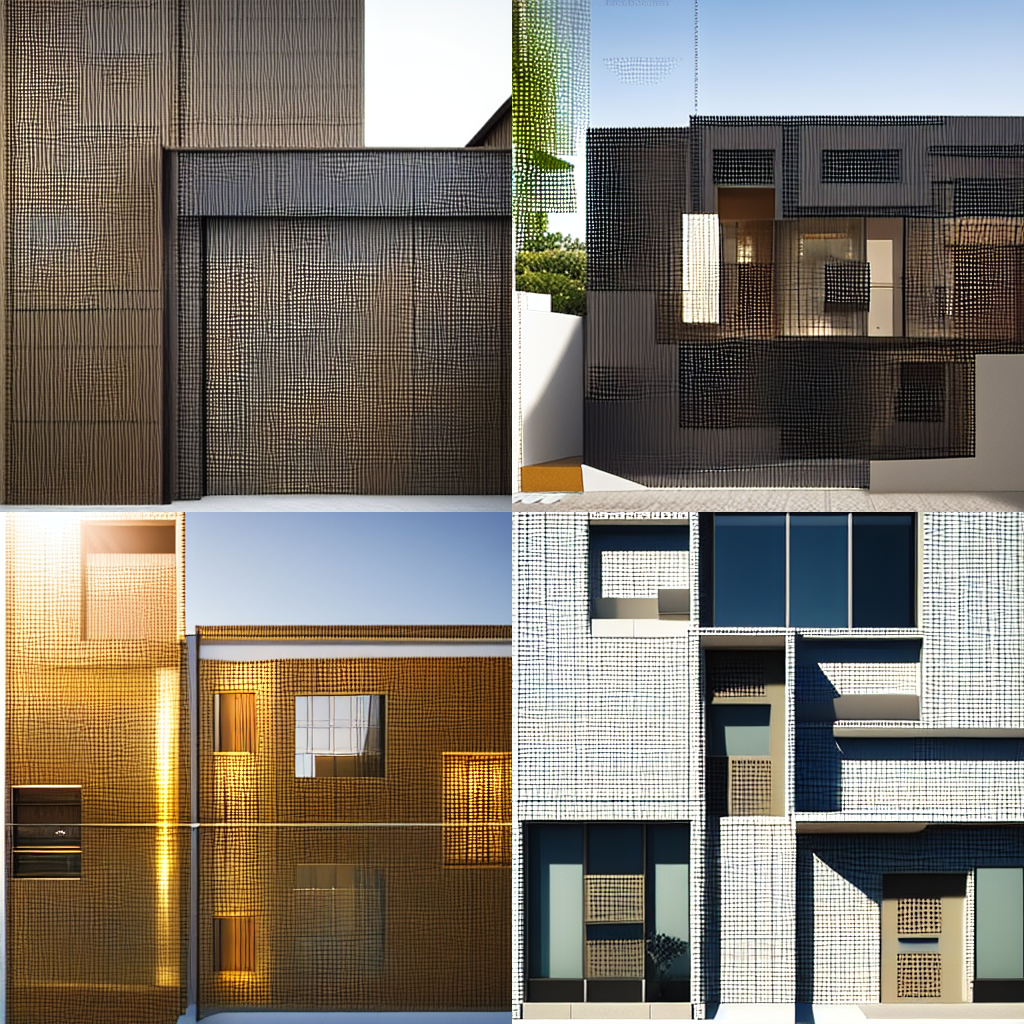


📁 Results saved in: output/Exterior4
🗜️ Zipped folder ready: output/Exterior4.zip

🔍 Individual views:

Front View:


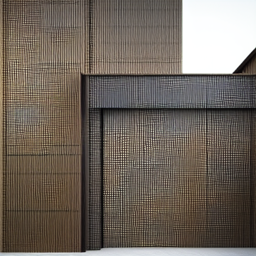


Back View:


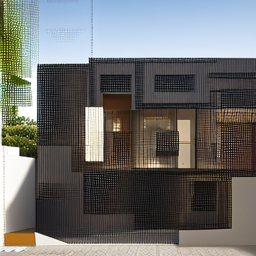


Left View:


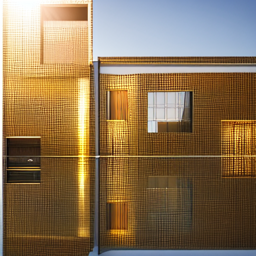


Right View:


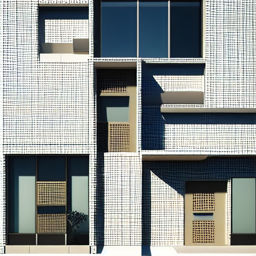

In [6]:
# ===============================
# 📦 Import Packages
# ===============================
import warnings
warnings.filterwarnings('ignore')
import torch
import cv2
import numpy as np
from PIL import Image
import random
import os
from tqdm import tqdm
from google.colab import files
from IPython.display import display, HTML
import urllib.request
import shutil  # For zipping

# Diffusion imports
from diffusers import StableDiffusionControlNetPipeline, ControlNetModel, UniPCMultistepScheduler

# ===============================
# 🖼️ Sample Floor Plan (Optional Input Image)
# ===============================
SAMPLE_IMAGE_URL = "https://i.imgur.com/XsYjZy5.png"

def get_input_image():
    print("🖼️ Choose input method:")
    display(HTML('''
    <script>
    function upload() {
        google.colab.kernel.invokeFunction('notebook.Upload', [], {});
    }
    </script>
    <button onclick="upload()">Upload Your Floor Plan</button>
    '''))

    try:
        uploaded = files.upload()
        if uploaded:
            return list(uploaded.keys())[0]
    except:
        pass

    print("📥 Using sample floor plan...")
    urllib.request.urlretrieve(SAMPLE_IMAGE_URL, "sample_floorplan.png")
    return "sample_floorplan.png"

# ===============================
# 🔧 Preprocessing Function
# ===============================
def preprocess_floor_plan(floor_plan_path):
    """Professional-grade floor plan processing."""
    img = cv2.imread(floor_plan_path)
    if img is None:
        raise ValueError("❗ Failed to load image.")

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    gray = cv2.equalizeHist(gray)

    thresh = cv2.adaptiveThreshold(
        gray, 255,
        cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
        cv2.THRESH_BINARY_INV,
        11, 2
    )

    kernel = np.ones((3, 3), np.uint8)
    processed = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)
    processed = cv2.dilate(processed, kernel, iterations=1)

    resized_image = cv2.resize(processed, (512, 512), interpolation=cv2.INTER_LANCZOS4)
    rgb_image = cv2.cvtColor(resized_image, cv2.COLOR_GRAY2RGB)

    return Image.fromarray(rgb_image)

# ===============================
# 🤖 Load AI Models
# ===============================
print("⏳ Loading AI models (this may take a few minutes)...")

controlnet = ControlNetModel.from_pretrained(
    "lllyasviel/sd-controlnet-canny",
    torch_dtype=torch.float16
)

pipe = StableDiffusionControlNetPipeline.from_pretrained(
    "runwayml/stable-diffusion-v1-5",
    controlnet=controlnet,
    torch_dtype=torch.float16
).to("cuda")

pipe.scheduler = UniPCMultistepScheduler.from_config(pipe.scheduler.config)
pipe.enable_xformers_memory_efficient_attention()

# Speed Optimization
pipe.unet = torch.compile(pipe.unet, mode="reduce-overhead", fullgraph=True)
pipe.vae = torch.compile(pipe.vae, mode="reduce-overhead", fullgraph=True)

# ===============================
# 🎨 Generation Prompts
# ===============================
import random

VIEW_CONFIG = {
    "Front": {
        "prompt": "Photo-realistic front elevation of modern minimalist house, real-world materials, weathered textures, realistic lighting, 8K DSLR photography, cinematic angle",
        "seed": random.randint(0, 99999)   # 🎲 Random seed!
    },
    "Back": {
        "prompt": "Realistic rear view of contemporary house, outdoor furniture, natural shadows, 8K architectural photo",
        "seed": random.randint(0, 99999)
    },
    "Left": {
        "prompt": "Ultra-detailed left side view of luxury house, realistic materials and reflections, Nikon D850 photo, golden hour lighting",
        "seed": random.randint(0, 99999)
    },
    "Right": {
        "prompt": "Right side realistic photo of a modern house, concrete and glass details, photorealistic shot",
        "seed": random.randint(0, 99999)
    }
}


# ===============================
# 🎨 Generate Exterior Views
# ===============================
def generate_views(control_image):
    results = {}
    print("\n🎨 Generating exterior views:")

    for view, config in tqdm(VIEW_CONFIG.items()):
        generator = torch.Generator(device="cuda").manual_seed(config["seed"])
        result = pipe(
            prompt=config["prompt"],
            negative_prompt="blurry, deformed, text, watermark, low quality",
            image=control_image,
            guidance_scale=8.5,
            num_inference_steps=45,
            generator=generator
        )
        results[view] = result.images[0]

    return results

# ===============================
# 🖼️ Create Collage
# ===============================
def create_collage(views):
    collage = Image.new('RGB', (1024, 1024))
    collage.paste(views["Front"].resize((512,512)), (0,0))
    collage.paste(views["Back"].resize((512,512)), (512,0))
    collage.paste(views["Left"].resize((512,512)), (0,512))
    collage.paste(views["Right"].resize((512,512)), (512,512))
    return collage

# ===============================
# 🗂️ Save Results Nicely
# ===============================
def save_results(views, collage):
    # Create 'output' folder if it doesn't exist
    if not os.path.exists("output"):
        os.makedirs("output")

    # Find next available ExteriorX folder
    i = 1
    while os.path.exists(f"output/Exterior{i}"):
        i += 1
    output_folder = f"output/Exterior{i}"
    os.makedirs(output_folder)

    # Save each view
    for name, img in views.items():
        img.save(os.path.join(output_folder, f"{name}.png"))

    # Save collage
    collage.save(os.path.join(output_folder, "Collage.png"))

    print(f"\n📁 Results saved in: {output_folder}")

    # Optional: Create ZIP
    shutil.make_archive(output_folder, 'zip', output_folder)
    print(f"🗜️ Zipped folder ready: {output_folder}.zip")

# ===============================
# 🚀 MAIN EXECUTION
# ===============================
# Step 1: Get input image
input_image_path = get_input_image()

# Step 2: Preprocess
print("\n🔧 Processing floor plan...")
control_image = preprocess_floor_plan(input_image_path)
display(control_image.resize((256, 256)))

# Step 3: Generate views
views = generate_views(control_image)

# Step 4: Show results
print("\n✅ Generation complete!")
collage = create_collage(views)
display(collage)

# Step 5: Save everything nicely
save_results(views, collage)

# Optional: Show individual views
print("\n🔍 Individual views:")
for name, img in views.items():
    print(f"\n{name} View:")
    display(img.resize((256,256)))